# Kickstarter project (need to spell check)
## Our project for this semester is to try and predict whether a fundraising campaign in kickstarter will succeed or not.

This type of prediction can actualy be useful in several scenarios, whether for an entrepreneur trying to evaluate his chances, the kickstarter company itself that would like to promote promising campaigns or for an investor considering backing a company.

There are a few datasets available in kaggle such as: [here](https://www.kaggle.com/codename007/funding-successful-projects) and [here](https://www.kaggle.com/kemical/kickstarter-projects). These datasets are more limited timespan wise and in their richness of data. The dataset that we used in our project is offered [here](https://webrobots.io/kickstarter-datasets/). It is very large and somewhat messy, so our first steps are going to be devoted to get to know this dataset and clean it up so we can use it easily.

The data is spread around some 57 very large csv files. Our first step would be to unify it all into a single dataframe, and explore the columns:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dataCleaning as dc
import visio
import seaborn as sns
%matplotlib inline

In [2]:
df = dc.make_dataframe() #Files are assumed to be located in rawData sub.dir. caches pickle in cwd.
#print first few rows
df.head()

read dataframe from cache rick.pickle


,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,85,Help support the legendary B.O.O.G.A. mutant v...,"{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",6223,US,the United States,1434317481,"{""id"":1120701030,""name"":""Shalin Scupham"",""is_r...",USD,$,...,thunder-gumbo-art-car-burning-man-2015-repairs...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1438323004,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",6223.000000,international
1,0,Handmade Organic comfortable trendy clothes fo...,"{""id"":264,""name"":""Childrenswear"",""slug"":""fashi...",0,CA,Canada,1471976279,"{""id"":2039752660,""name"":""Cassandra Derosa"",""is...",CAD,$,...,little-d-threads,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1472164799,0.774623,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic
2,98,"In NYC, 2 days before the U.N. Climate Summit,...","{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",5667,US,the United States,1407432996,"{""id"":627800435,""name"":""LigoranoReese"",""slug"":...",USD,$,...,dawn-of-the-anthropocene-public-art-ice-sculpture,https://www.kickstarter.com/discover/categorie...,True,True,successful,1412170599,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5667.000000,international
3,2,21m breaches in 2016 alone. Presenting a video...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",278,GB,the United Kingdom,1469605439,"{""id"":1235898470,""name"":""David Bochenski"",""is_...",GBP,£,...,securing-systems-with-hashicorp-vault-online-v...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1475249402,1.310662,"{""web"":{""project"":""https://www.kickstarter.com...",281.792410,domestic
4,307,We are opening our first restaurant in Camberw...,"{""id"":314,""name"":""Spaces"",""slug"":""food/spaces""...",75884,GB,the United Kingdom,1408629571,"{""id"":628839064,""name"":""Michael Richardson"",""s...",GBP,£,...,mike-and-ollie-45-camberwell-church-street,https://www.kickstarter.com/discover/categorie...,True,True,successful,1441580413,1.564891,"{""web"":{""project"":""https://www.kickstarter.com...",78282.124892,domestic


Great! Let's get a few details about this data: What are the features, how many records exist:

In [3]:
cols = list(df.columns.values)
print(cols)
num_recs = len(df.index)
print()
print('There are originaly ', f'{num_recs:,}' , 'records in data')

['backers_count', 'blurb', 'category', 'converted_pledged_amount', 'country', 'country_displayable_name', 'created_at', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'deadline', 'disable_communication', 'friends', 'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged', 'usd_type']

There are originaly  211,424 records in data


We can already see redundant attributes which we are sure we will not need (used for display purpases). Let's start with dropping these.


In [4]:
redundant = ['country_displayable_name', 'currency_symbol', 'currency_trailing_code', 'current_currency',
             'source_url','disable_communication', 'profile','urls','photo', 'static_usd_rate', 'usd_pledged', 'usd_type']
df.drop(columns=redundant, inplace=True)
print('sanity check, print new columns:')
cols = list(df.columns.values)
print(cols)

sanity check, print new columns:
['backers_count', 'blurb', 'category', 'converted_pledged_amount', 'country', 'created_at', 'creator', 'currency', 'deadline', 'friends', 'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location', 'name', 'permissions', 'pledged', 'slug', 'spotlight', 'staff_pick', 'state', 'state_changed_at']


Taking a first peek at the data via Excel hints that there are still many empty columns:
![peek](img/firstPeek.png)

Let's see what columns contain mostly null values:


In [5]:
nes = df.isna().sum()
print(nes)

backers_count                    0
blurb                            8
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
deadline                         0
friends                     210980
fx_rate                          0
goal                             0
id                               0
is_backing                  210980
is_starrable                     0
is_starred                  210980
launched_at                      0
location                       217
name                             0
permissions                 210980
pledged                          0
slug                             0
spotlight                        0
staff_pick                       0
state                            0
state_changed_at                 0
dtype: int64


Looks like we can drop 'friends','is_backing','is_starred','permissions' as well.

In [6]:
empty = ['friends','is_backing','is_starred','permissions']
df.drop(columns=empty,inplace=True)
cols = list(df.columns.values)
print(cols)

['backers_count', 'blurb', 'category', 'converted_pledged_amount', 'country', 'created_at', 'creator', 'currency', 'deadline', 'fx_rate', 'goal', 'id', 'is_starrable', 'launched_at', 'location', 'name', 'pledged', 'slug', 'spotlight', 'staff_pick', 'state', 'state_changed_at']


From looking at the data we can also see that the time fields are given in UNIX time. It'll be usefull ahead if we can break each date into a day month year trio. We'll run the conversion and replace each column with the corresponding 3 fields.

In [7]:
timefields = ['created_at','deadline','launched_at','state_changed_at']
dc.convert_time(df,timefields)
print('sanity check')
df.head()

sanity check


,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,deadline,fx_rate,...,is_starrable,launched_at,location,name,pledged,slug,spotlight,staff_pick,state,state_changed_at
0,85,Help support the legendary B.O.O.G.A. mutant v...,"{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",6223,US,2015-06-14 21:31:21,"{""id"":1120701030,""name"":""Shalin Scupham"",""is_r...",USD,2015-07-31 06:10:04,1.000000,...,False,2015-07-01 06:10:04,"{""id"":99999999,""name"":""Black Rock City"",""slug""...",Bring the Thunder Gumbo Art Car to Burning Man...,6223.0,thunder-gumbo-art-car-burning-man-2015-repairs...,True,False,successful,2015-07-31 06:10:04
1,0,Handmade Organic comfortable trendy clothes fo...,"{""id"":264,""name"":""Childrenswear"",""slug"":""fashi...",0,CA,2016-08-23 18:17:59,"{""id"":2039752660,""name"":""Cassandra Derosa"",""is...",CAD,2016-09-22 22:16:46,0.754185,...,False,2016-08-23 22:16:46,"{""id"":8676,""name"":""Edmonton"",""slug"":""edmonton-...",Little D Threads (Canceled),0.0,little-d-threads,False,False,canceled,2016-08-25 22:39:59
2,98,"In NYC, 2 days before the U.N. Climate Summit,...","{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",5667,US,2014-08-07 17:36:36,"{""id"":627800435,""name"":""LigoranoReese"",""slug"":...",USD,2014-10-01 13:36:39,1.000000,...,False,2014-08-22 13:36:39,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...",Dawn of the Anthropocene - Public Art Ice Scul...,5667.0,dawn-of-the-anthropocene-public-art-ice-sculpture,True,True,successful,2014-10-01 13:36:39
3,2,21m breaches in 2016 alone. Presenting a video...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",278,GB,2016-07-27 07:43:59,"{""id"":1235898470,""name"":""David Bochenski"",""is_...",GBP,2016-09-30 15:30:00,1.283686,...,False,2016-09-01 11:28:17,"{""id"":12602189,""name"":""Staffordshire"",""slug"":""...",Securing Systems with Hashicorp Vault - Online...,215.0,securing-systems-with-hashicorp-vault-online-v...,False,False,failed,2016-09-30 15:30:02
4,307,We are opening our first restaurant in Camberw...,"{""id"":314,""name"":""Spaces"",""slug"":""food/spaces""...",75884,GB,2014-08-21 13:59:31,"{""id"":628839064,""name"":""Michael Richardson"",""s...",GBP,2015-09-06 23:00:00,1.283686,...,False,2015-08-18 13:21:59,"{""id"":44418,""name"":""London"",""slug"":""london-gb""...",Mike and Ollie: 45 Camberwell Church Street,50024.0,mike-and-ollie-45-camberwell-church-street,True,True,successful,2015-09-06 23:00:13


Another inconviniency in this dataset is that some of the fields are given in json form, specificaly the 'catagory' and 'creator' attributs. We'll parse just the interesting parts out of these fields and remove all bloat text.

In [8]:
dc.extract_creator(df) #replaces the creator json with creator id int
dc.extract_catagories(df) #gets project catagory data

Cool! now, one last check we need to do, is to check for duplicates in our dataset.
If we find any duplicates (by project id). We will drop all earlier appearances of the same project. Note that this action sorts all projects by update date, so we need to take that in consideration up ahead.

In [9]:
print('There are originaly ', f'{num_recs:,}' , 'records in data')
dc.remove_duplicates(df)
num_recs = len(df.index)
print('After processing there are ', f'{num_recs:,}' , 'records in data')

There are originaly  211,424 records in data
After processing there are  184,535 records in data


One last thing that remains is to convert the goal amount which is the project's local currency (and not usd).
Once this is done we no longer need the fx column as well (it is dropped by the function).

In [10]:
dc.convert_goal(df)

Now we are ready to begin exploring our data.
As this is basicaly what we are asking, let's see how many projects of each status are in our dataset.

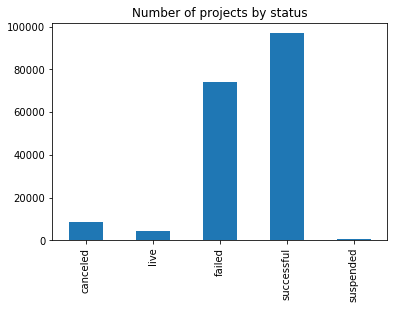

In [11]:
visio.plot_projStat(df)

Since live projects can't be used, we'll clear them out and also unite suspended and canceled project to be labled as failed. which gives us:

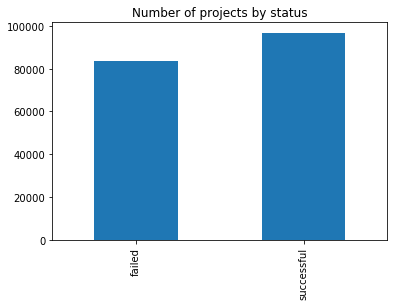

In [12]:
dc.fix_state(df)
df.reset_index(drop=True, inplace=True)
visio.plot_projStat(df)

Projects by origin country:

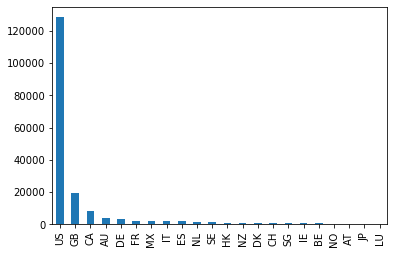

In [13]:
df['country'].value_counts().plot.bar()

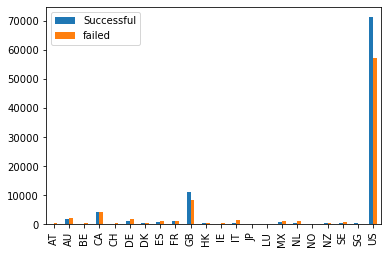

In [14]:
suc = df.loc[df['state'] == 'successful']
f = df.loc[df['state'] == 'failed']
sc = suc['country'].value_counts()
sf = f['country'].value_counts()
d = pd.DataFrame({'Successful': sc, 'failed': sf})
d.plot.bar()

Success rate by catagory

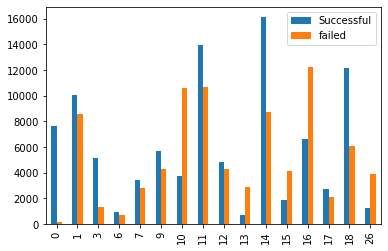

In [15]:
suc = df.loc[df['state'] == 'successful']
f = df.loc[df['state'] == 'failed']
sc = suc['parent_category'].value_counts()
sf = f['parent_category'].value_counts()
d = pd.DataFrame({'Successful': sc, 'failed': sf})
d.plot.bar()

number of records out of range: 20116


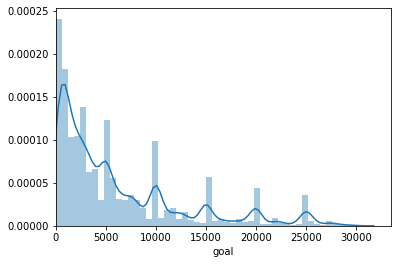

In [16]:
inner = df.loc[df['goal']<30000]
sns.distplot(inner['goal']).set(xlim=(0))
print('number of records out of range:',len(df.loc[df['goal']>30000]))

number of records out of range: 11402


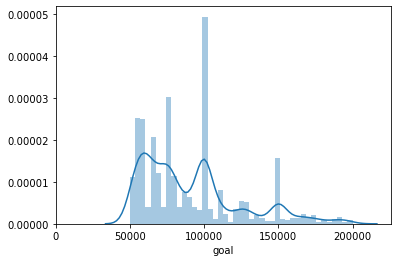

In [17]:
inner = df.loc[df['goal']>50000]
inner = inner.loc[df['goal']<200000]
sns.distplot(inner['goal']).set(xlim=(0))
print('number of records out of range:',len(df.loc[df['goal']>50000]))

number of records out of range: 20116


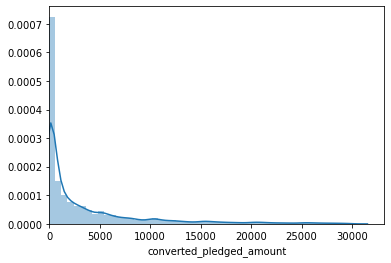

In [18]:
inner = df.loc[df['converted_pledged_amount']<30000]
sns.distplot(inner['converted_pledged_amount']).set(xlim=(0))
print('number of records out of range:',len(df.loc[df['goal']>30000]))

In [19]:
dc.add_ratio(df)

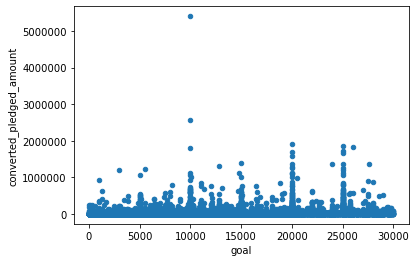

In [20]:
cent = df.loc[df['goal']<30000]
cent.plot.scatter(x='goal',y='converted_pledged_amount')